<a href="https://colab.research.google.com/github/AIceDog/Pyotrch-Notes/blob/master/Pytorch_Model_Learning_Notes_conv1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

# TORCH.NN.FUNCTIONAL.CONV1D

torch.nn.functional.conv1d(input, weight, bias=None, stride=1, padding=0, dilation=1, groups=1) → Tensor

Input is one-dimensional input, with the shape of (batch size, in channel, Length); batch size is the size of training batch; in channel is the number of input channels; Length is the Length of input, because it is one-dimensional input, it has only Length. 

weight is a one-dimensional convolution kernel, whose shape is (out channel, in channel / group, kernel size); out channel is the number of output channels; in channel / group aims to determine how the output of each layer is composed of input, which will be described in detail later.

In [ ]:
Batch_Size = 6
In_Channel = 4
Length = 10
inputs = torch.randint(10, (Batch_Size, In_Channel, Length))
print(inputs.shape)
print(inputs)

torch.Size([6, 4, 10])
tensor([[[0, 8, 9, 5, 1, 9, 8, 2, 4, 2],
         [2, 7, 5, 0, 8, 7, 5, 8, 4, 3],
         [0, 9, 6, 7, 9, 2, 2, 5, 8, 9],
         [5, 7, 3, 0, 1, 9, 7, 2, 5, 7]],

        [[3, 7, 8, 3, 9, 4, 3, 7, 3, 1],
         [6, 1, 6, 3, 1, 1, 5, 4, 4, 4],
         [0, 7, 2, 0, 0, 4, 7, 9, 1, 9],
         [1, 1, 1, 5, 2, 9, 0, 8, 4, 5]],

        [[1, 5, 0, 3, 7, 1, 8, 2, 1, 1],
         [8, 3, 9, 5, 1, 5, 8, 5, 0, 1],
         [7, 8, 9, 5, 8, 4, 7, 3, 9, 3],
         [4, 1, 9, 7, 9, 2, 8, 7, 7, 9]],

        [[2, 3, 6, 9, 2, 2, 5, 1, 8, 3],
         [8, 8, 5, 7, 3, 4, 9, 0, 3, 6],
         [4, 4, 7, 6, 4, 7, 5, 2, 3, 7],
         [8, 4, 7, 1, 0, 4, 1, 6, 5, 2]],

        [[6, 7, 8, 7, 9, 6, 8, 4, 4, 8],
         [9, 7, 7, 9, 5, 3, 4, 3, 9, 8],
         [0, 5, 1, 8, 2, 4, 9, 0, 8, 3],
         [3, 3, 2, 5, 3, 2, 8, 2, 8, 7]],

        [[3, 5, 1, 6, 9, 9, 3, 9, 3, 9],
         [7, 1, 2, 7, 8, 5, 2, 1, 1, 9],
         [9, 5, 5, 0, 9, 9, 9, 7, 7, 4],
         [8, 7, 8, 8, 5,

In [ ]:
Out_Channel = 7
Group = 1
Kernel_Size = 3
filters = torch.randint(10, (Out_Channel, int(In_Channel/Group), Kernel_Size))
print(filters.shape)
print(filters)

torch.Size([7, 4, 3])
tensor([[[7, 8, 1],
         [7, 4, 0],
         [6, 2, 5],
         [5, 0, 9]],

        [[1, 5, 5],
         [5, 0, 2],
         [8, 9, 2],
         [8, 1, 3]],

        [[1, 0, 6],
         [4, 6, 6],
         [8, 8, 2],
         [9, 6, 9]],

        [[2, 6, 2],
         [7, 9, 2],
         [6, 0, 6],
         [9, 6, 1]],

        [[2, 4, 8],
         [9, 3, 2],
         [9, 9, 8],
         [3, 3, 2]],

        [[1, 4, 4],
         [8, 7, 7],
         [6, 6, 8],
         [9, 0, 9]],

        [[9, 1, 5],
         [0, 9, 5],
         [9, 6, 0],
         [6, 9, 4]]])


In [ ]:
result = F.conv1d(inputs, filters)
print(result.shape)
print(result)

torch.Size([6, 7, 8])
tensor([[[215, 338, 258, 235, 307, 302, 285, 284],
         [254, 312, 236, 238, 268, 239, 221, 250],
         [332, 311, 241, 368, 371, 310, 316, 321],
         [279, 351, 219, 189, 337, 347, 291, 269],
         [324, 391, 307, 305, 364, 288, 297, 350],
         [342, 364, 315, 343, 371, 359, 370, 370],
         [300, 337, 249, 360, 354, 339, 314, 261]],

        [[169, 243, 178, 248, 162, 286, 232, 304],
         [199, 171, 135, 162, 134, 276, 245, 237],
         [201, 215, 183, 197, 185, 363, 303, 316],
         [155, 197, 176, 190, 188, 267, 233, 315],
         [254, 200, 205, 177, 205, 322, 307, 298],
         [236, 230, 171, 251, 185, 406, 279, 360],
         [174, 265, 229, 154, 251, 303, 310, 318]],

        [[319, 254, 344, 236, 300, 266, 345, 225],
         [290, 238, 336, 269, 285, 232, 256, 240],
         [366, 391, 446, 312, 412, 334, 351, 322],
         [280, 276, 376, 277, 295, 286, 348, 199],
         [361, 335, 422, 301, 335, 296, 340, 255],
     

In [3]:
import numpy as np

In [ ]:
test_input1 = np.array([[0, 8, 9], 
                       [2, 7, 5], 
                       [0, 9, 6], 
                       [5, 7, 3]])

test_filter1 = np.array([[7, 8, 1], 
                        [7, 4, 0], 
                        [6, 2, 5], 
                        [5, 0, 9]])

In [ ]:
sum(sum(test_input1 * test_filter1))

215

In [ ]:
test_input2 = np.array([[8, 9, 5], 
                       [7, 5, 0], 
                       [9, 6, 7], 
                       [7, 3, 0]])

test_filter2 = np.array([[7, 8, 1], 
                        [7, 4, 0], 
                        [6, 2, 5], 
                        [5, 0, 9]])

In [ ]:
sum(sum(test_input2 * test_filter2))

338

In [ ]:
test_input3 = np.array([[3, 7, 8], 
                       [6, 1, 6], 
                       [0, 7, 2], 
                       [1, 1, 1]])

test_filter3 = np.array([[7, 8, 1], 
                        [7, 4, 0], 
                        [6, 2, 5], 
                        [5, 0, 9]])

In [ ]:
sum(sum(test_input3 * test_filter3))

169

In [ ]:
test_input4 = np.array([[0, 8, 9], 
                       [2, 7, 5], 
                       [0, 9, 6], 
                       [5, 7, 3]])

test_filter4 = np.array([[1, 5, 5], 
                        [5, 0, 2], 
                        [8, 9, 2], 
                        [8, 1, 3]])

In [ ]:
sum(sum(test_input4 * test_filter4))

254

In [ ]:
test_input5 = np.array([[0, 8, 9], 
                       [2, 7, 5], 
                       [0, 9, 6], 
                       [5, 7, 3]])

test_filter5 = np.array([[1, 0, 6], 
                        [4, 6, 6], 
                        [8, 8, 2], 
                        [9, 6, 9]])

In [ ]:
sum(sum(test_input5 * test_filter5))

332

In [ ]:
test_input5 = np.array([[3, 7, 8], 
                       [6, 1, 6], 
                       [0, 7, 2], 
                       [1, 1, 1]])

test_filter5 = np.array([[7, 8, 1], 
                        [7, 4, 0], 
                        [6, 2, 5], 
                        [5, 0, 9]])

In [ ]:
sum(sum(test_input5 * test_filter5))

169

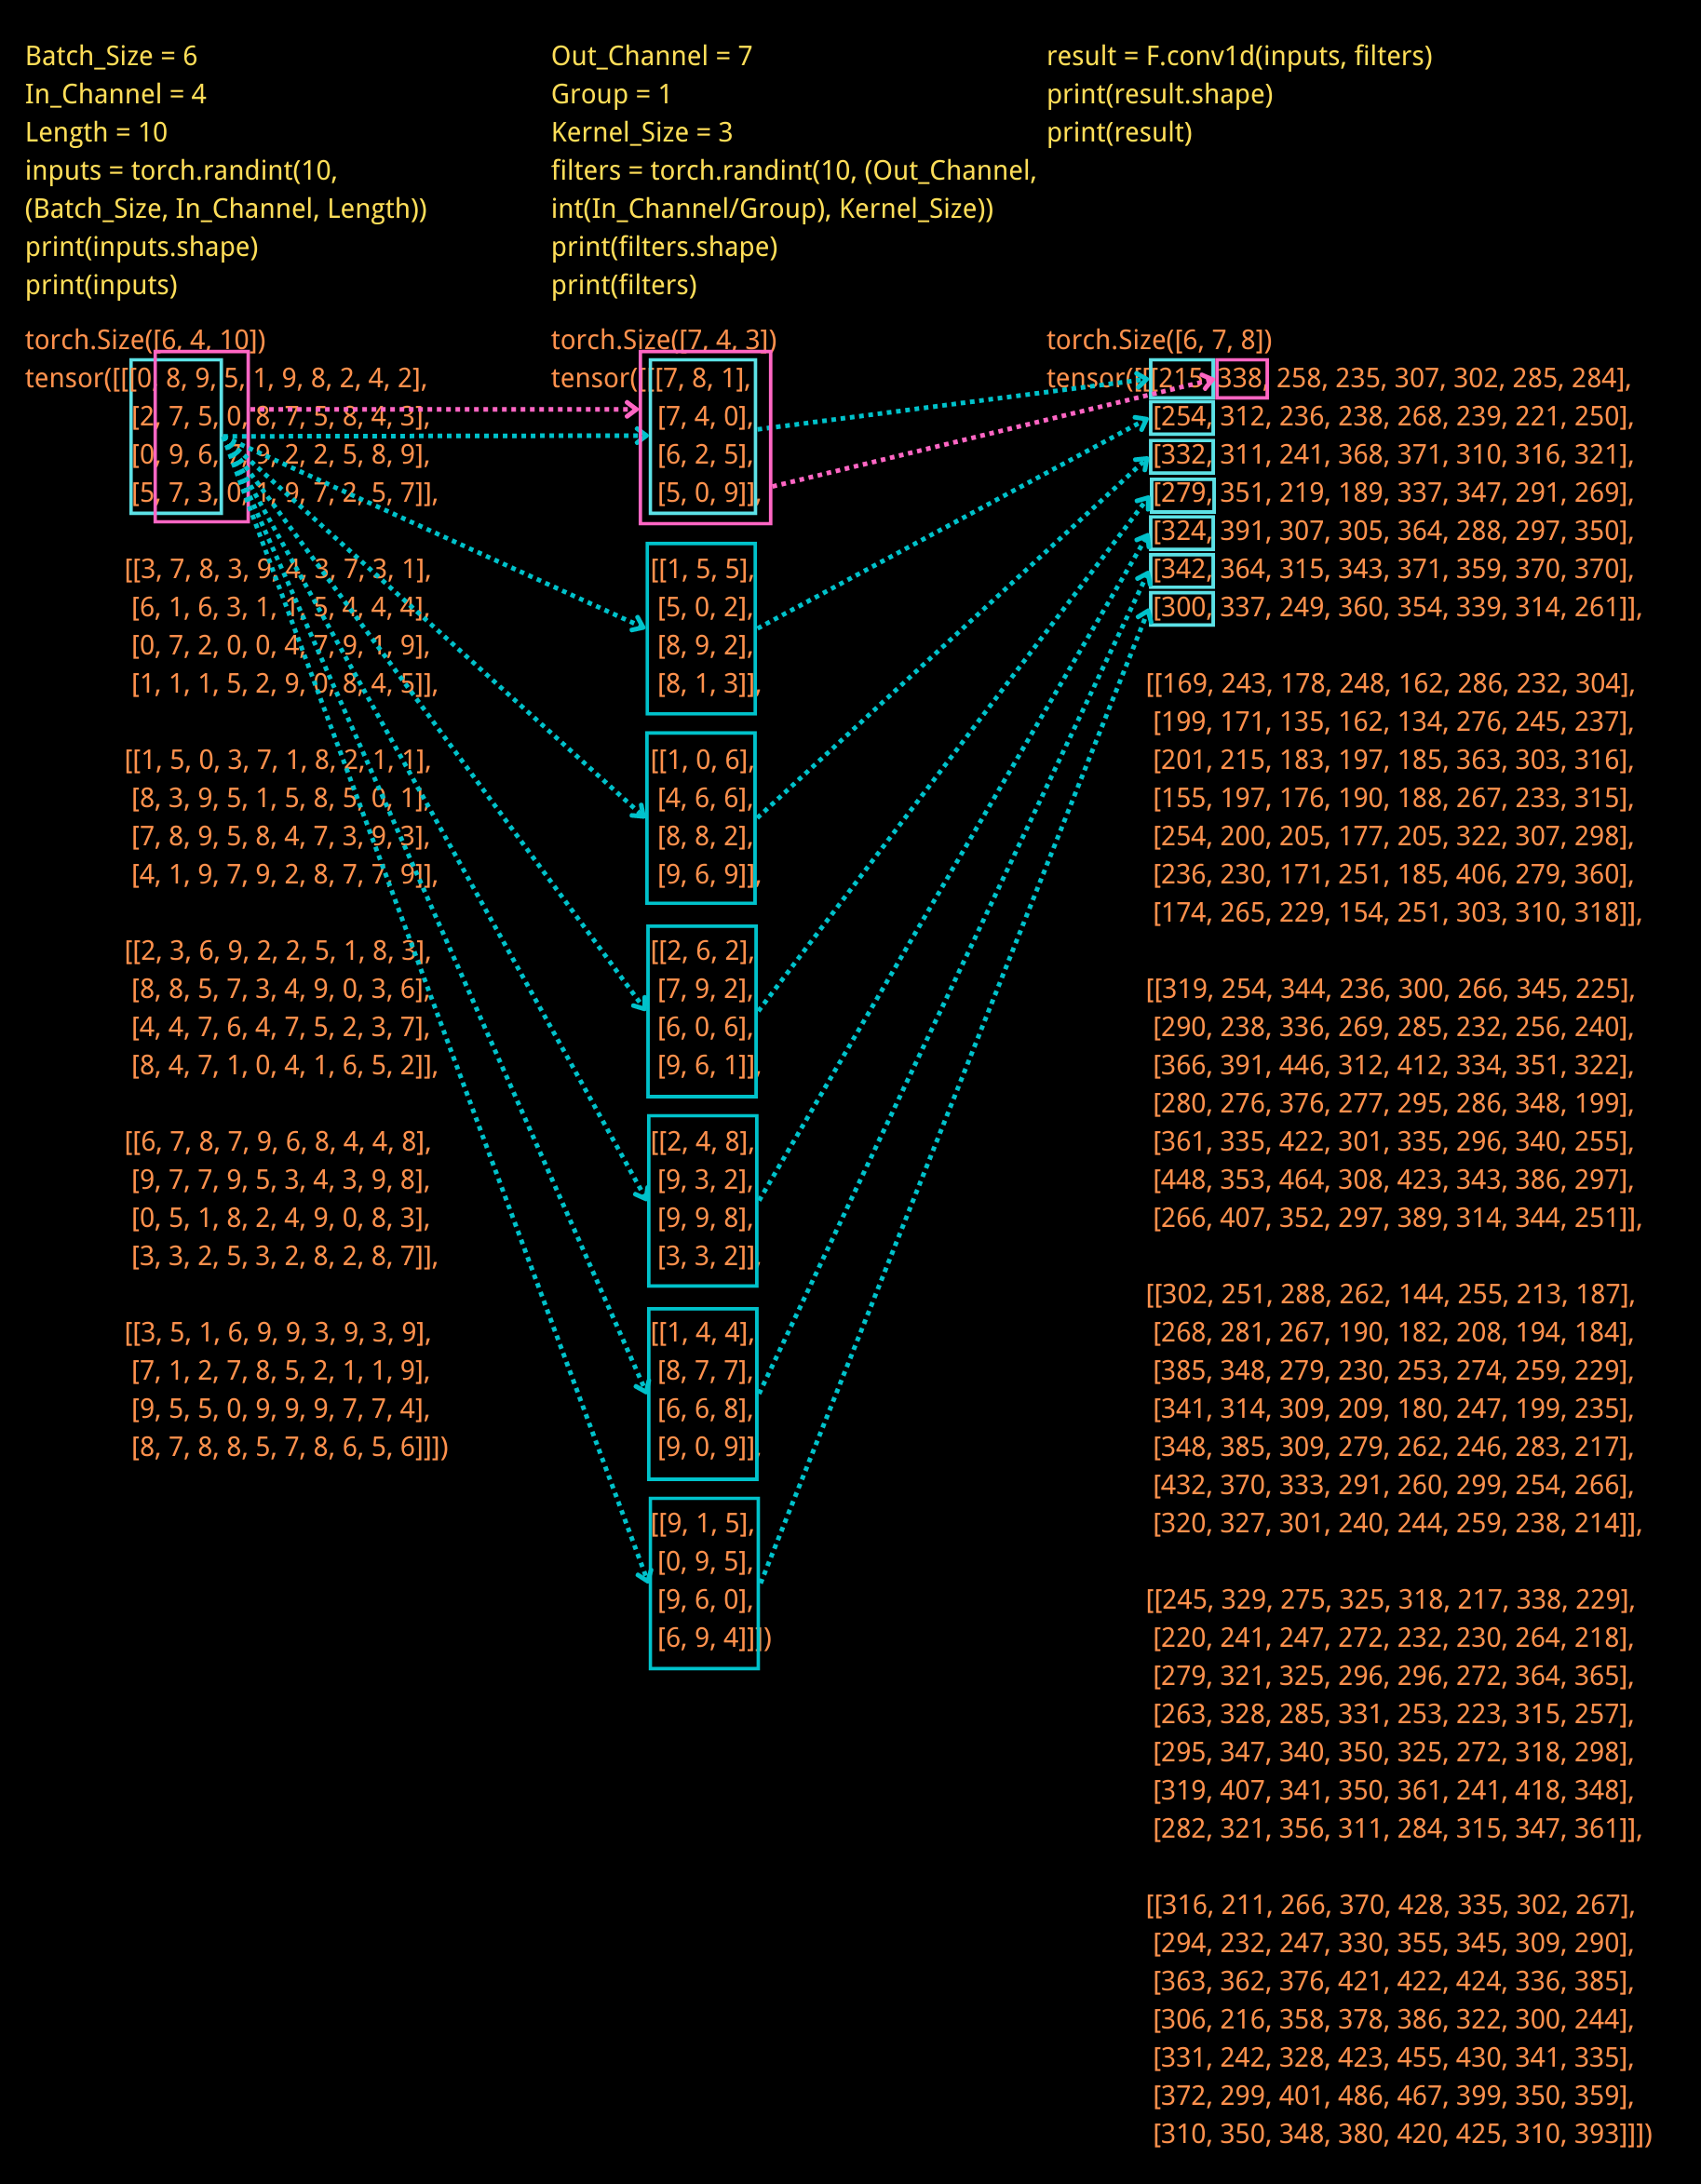

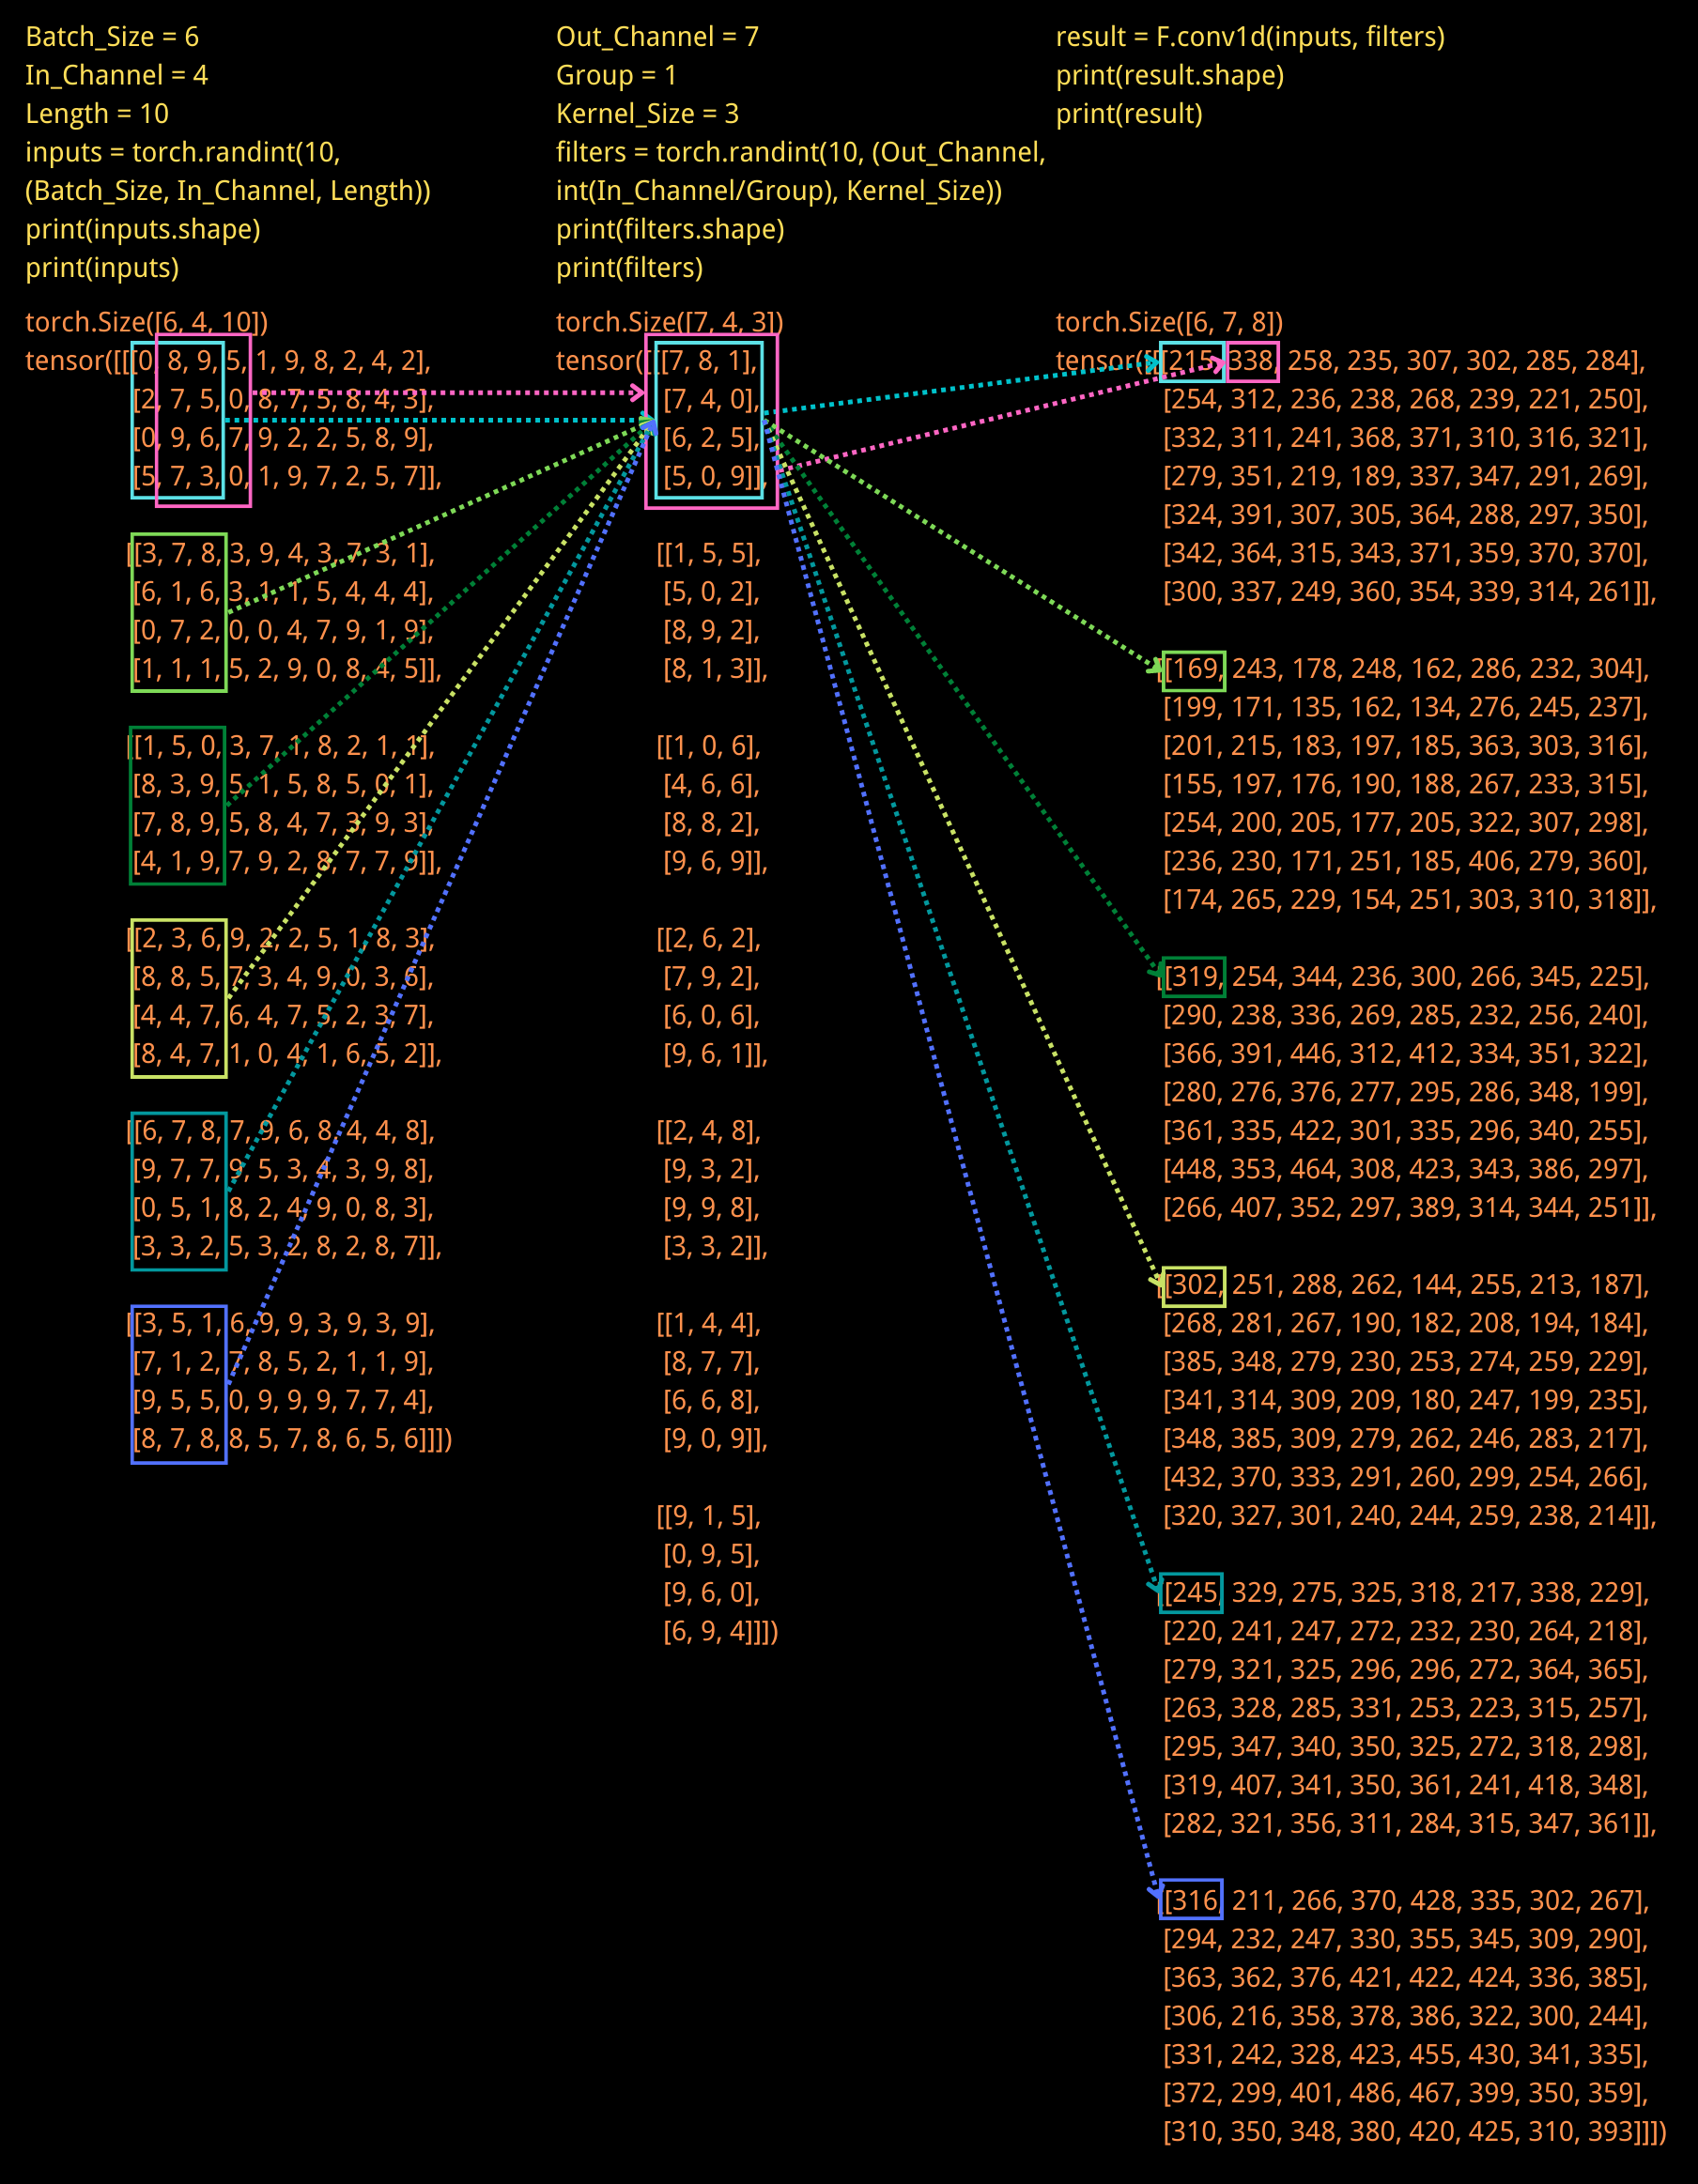

In [ ]:
Batch_Size = 1
In_Channel = 4
Length = 10
inputs = torch.randint(10, (In_Channel, Length))
print(inputs.shape)
print(inputs)

torch.Size([4, 10])
tensor([[1, 2, 9, 5, 4, 9, 0, 5, 3, 3],
        [3, 2, 6, 5, 1, 2, 7, 5, 8, 7],
        [6, 7, 8, 3, 3, 0, 0, 2, 6, 4],
        [3, 0, 0, 4, 5, 5, 8, 8, 1, 5]])


In [ ]:
Out_Channel = 7
Group = 1
Kernel_Size = 3
filters = torch.randint(10, (Out_Channel, int(In_Channel/Group), Kernel_Size))
print(filters.shape)
print(filters)

torch.Size([7, 4, 3])
tensor([[[9, 9, 9],
         [4, 3, 8],
         [7, 0, 1],
         [3, 4, 7]],

        [[5, 8, 9],
         [7, 3, 6],
         [2, 4, 4],
         [7, 1, 5]],

        [[4, 5, 5],
         [8, 0, 9],
         [5, 3, 6],
         [1, 5, 2]],

        [[4, 7, 3],
         [1, 5, 0],
         [6, 8, 1],
         [5, 1, 0]],

        [[7, 1, 2],
         [8, 3, 7],
         [0, 2, 5],
         [5, 3, 7]],

        [[0, 0, 2],
         [2, 4, 5],
         [6, 3, 5],
         [9, 5, 9]],

        [[4, 7, 1],
         [7, 8, 7],
         [3, 0, 8],
         [1, 0, 2]]])


In [ ]:
result = F.conv1d(inputs, filters)
print(result.shape)
print(result)

torch.Size([7, 8])
tensor([[233, 290, 319, 289, 295, 300, 248, 280],
        [258, 267, 253, 264, 233, 246, 280, 303],
        [239, 224, 235, 206, 193, 195, 260, 228],
        [173, 227, 193, 152, 138, 123, 146, 200],
        [168, 161, 214, 190, 196, 260, 243, 267],
        [186, 180, 182, 175, 205, 234, 237, 255],
        [191, 226, 222, 137, 181, 183, 241, 248]])


In [ ]:
test_input6 = np.array([[1, 2, 9], 
                       [3, 2, 6], 
                       [6, 7, 8], 
                       [3, 0, 0]])

test_filter6 = np.array([[9, 9, 9], 
                        [4, 3, 8], 
                        [7, 0, 1], 
                        [3, 4, 7]])
sum(sum(test_input6 * test_filter6))

233

In [ ]:
test_input7 = np.array([[1, 2, 9], 
                       [3, 2, 6], 
                       [6, 7, 8], 
                       [3, 0, 0]])

test_filter7 = np.array([[5, 8, 9], 
                        [7, 3, 6], 
                        [2, 4, 4], 
                        [7, 1, 5]])
sum(sum(test_input7 * test_filter7))

258

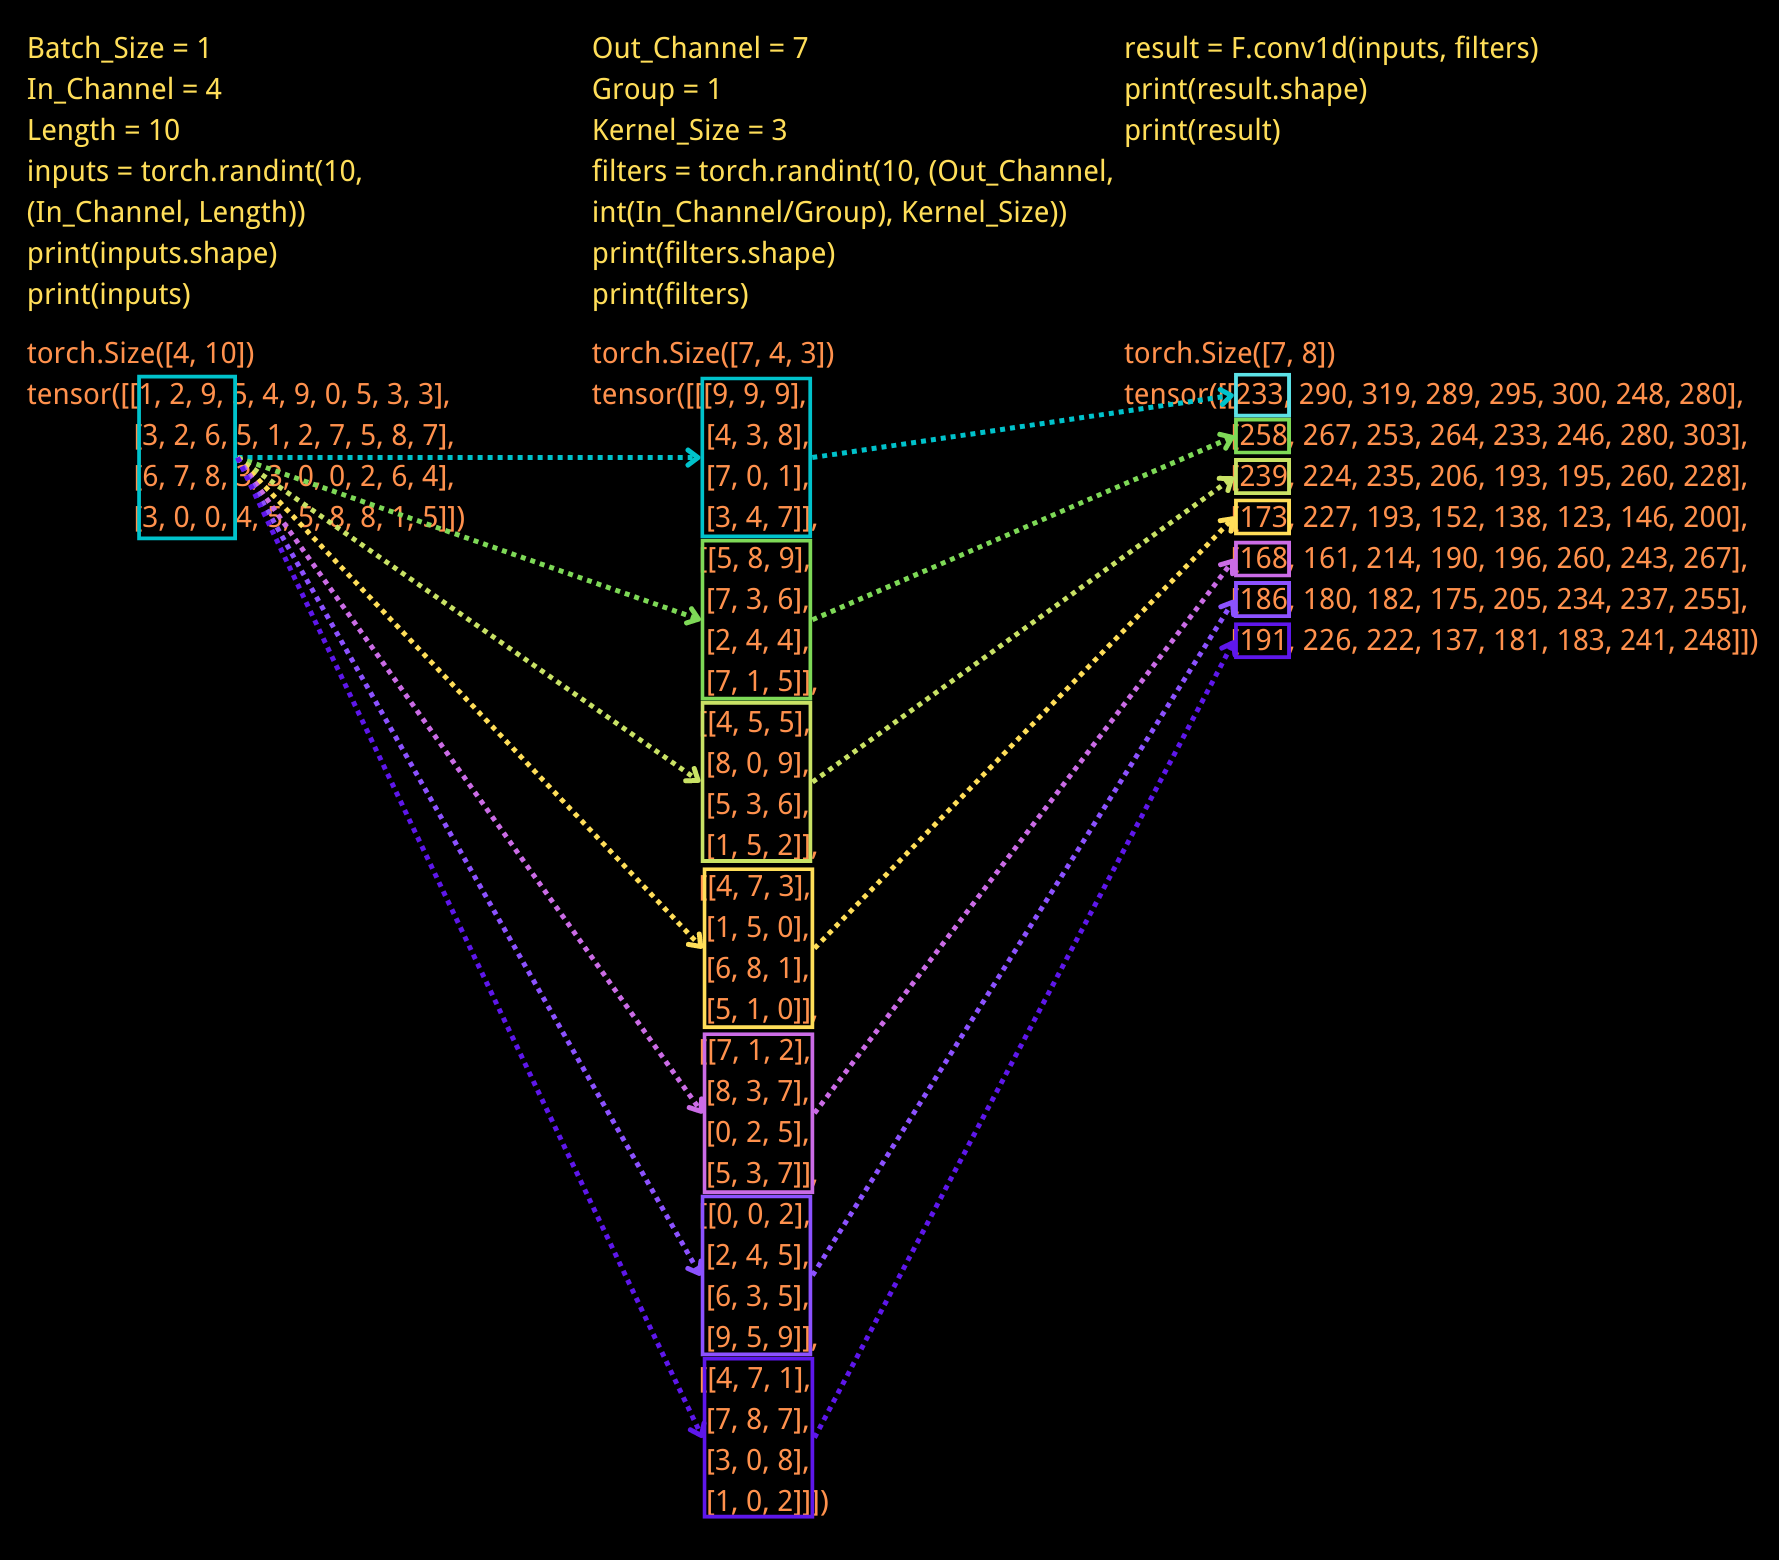

# CLASS torch.nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)



*   in_channels(int) 输入信号的通道
*   out_channels(int) 卷积产生的通道。有多少个out_channels，就需要多少个1维卷积
*   kernel_size(int or tuple) - 卷积核的尺寸，卷积核的大小为(k,)，第二个维度是由in_channels来决定的，所以实际上卷积大小为 kernel_size * in_channels
*   stride(int or tuple, optional) - 卷积步长
*   padding (int or tuple, optional)- 输入的每一条边补充0的层数
*   dilation(int or tuple, `optional``) – 卷积核元素之间的间距
*   groups(int, optional) – 从输入通道到输出通道的阻塞连接数
*   bias(bool, optional) - 如果bias=True，添加偏置









In [6]:
import torch
import torch.nn as nn

In [7]:
filters_2 = nn.Conv1d(3, 5, 2, stride=1) # input_channel : 3, output_channel : 5, kernel_size : 2
print('filters_2 : ', filters_2, '\n')
print('filters_2.weight.shape : ', filters_2.weight.shape) # one kernel shape is [input_channel, kernel_size], there are as many kernels as there are output_channels
print('filters_2.weight(filters_2.weight initialize values randomly) : ', filters_2.weight, '\n')
print('filters_2.bias.shape : ', filters_2.bias.shape)
print('filters_2.bias(filters_2.bias initialize values randomly) : ', filters_2.bias)

filters_2 :  Conv1d(3, 5, kernel_size=(2,), stride=(1,)) 

filters_2.weight.shape :  torch.Size([5, 3, 2])
filters_2.weight(filters_2.weight initialize values randomly) :  Parameter containing:
tensor([[[ 0.1799,  0.1436],
         [ 0.0962,  0.0908],
         [-0.2533,  0.0697]],

        [[ 0.1131, -0.2961],
         [ 0.1714,  0.1254],
         [ 0.2546, -0.0153]],

        [[ 0.2958, -0.2575],
         [ 0.0257,  0.2501],
         [ 0.0999,  0.2592]],

        [[-0.1506,  0.0283],
         [ 0.3663, -0.1192],
         [-0.3900,  0.0788]],

        [[-0.1274, -0.3723],
         [ 0.1051,  0.2681],
         [ 0.1541,  0.3067]]], requires_grad=True) 

filters_2.bias.shape :  torch.Size([5])
filters_2.bias(filters_2.bias initialize values randomly) :  Parameter containing:
tensor([-0.0715, -0.0624,  0.1853, -0.2646, -0.0473], requires_grad=True)


In [8]:
input_2 = torch.randn(2, 3, 7) # batch number : 2, input channel : 3, the length of signal sequence : 7
print('input_2.shape : ', input_2.shape)
print('input_2 : ', input_2)

input_2.shape :  torch.Size([2, 3, 7])
input_2 :  tensor([[[-0.4043, -0.1485,  1.2488, -0.4211,  0.4286, -0.4228, -0.3648],
         [ 1.9936, -2.6003, -1.0615,  0.4938, -1.5894, -0.3484,  1.0070],
         [ 0.1943, -0.3464, -1.8782,  0.4160, -0.5067, -2.0718, -0.7024]],

        [[-1.3484,  0.8195,  1.0051, -0.0571, -0.4784, -0.5076, -1.1235],
         [ 0.7846,  0.2347, -1.0839,  0.3951,  1.7385, -1.5769, -0.4258],
         [ 0.6794, -1.4768,  0.1766, -0.7370, -0.8002, -0.8971, -1.1821]]])


In [21]:
output_2 = filters_2(input_2) # batch number is 2, input channel is 5
print('output.shape : ', output_2.shape)
print('output : ', output_2)

output.shape :  torch.Size([2, 5, 6])
output :  tensor([[[-0.2833, -0.3086,  0.5403, -0.3232, -0.2557,  0.3339],
         [ 0.0062, -1.0873, -0.4011, -0.2380, -0.3022, -0.4524],
         [-0.5655, -1.0339,  0.6795, -0.5243, -0.2947,  0.0081],
         [ 0.7292, -1.0456, -0.1469, -0.0209, -0.8473,  0.2938],
         [-0.5044, -1.6807, -0.1907, -0.6187, -0.9185, -0.1591]],

        [[-0.3747,  0.5309, -0.0633,  0.1764, -0.0662, -0.3697],
         [-0.0980, -0.7418, -0.0118,  0.1832, -0.0559, -0.3211],
         [-0.6606, -0.1979,  0.3948,  0.4556, -0.4876, -0.2186],
         [-0.1603,  0.4455, -0.9886, -0.1077,  0.8593, -0.4900],
         [-0.3836, -0.9653, -0.3609,  0.2867, -0.4359, -0.3451]]],
       grad_fn=<ConvolutionBackward0>)


In [22]:
test_filter7 = np.array([[-0.4043, -0.1485], 
                         [1.9936, -2.6003], 
                         [0.1943, -0.3464]]) 

test_input7 = np.array([[0.1799,  0.1436], 
                        [0.0962,  0.0908], 
                        [-0.2533,  0.0697]]) 
print(sum(sum(test_filter7 * test_input7)) - 0.0715)

-0.28324136


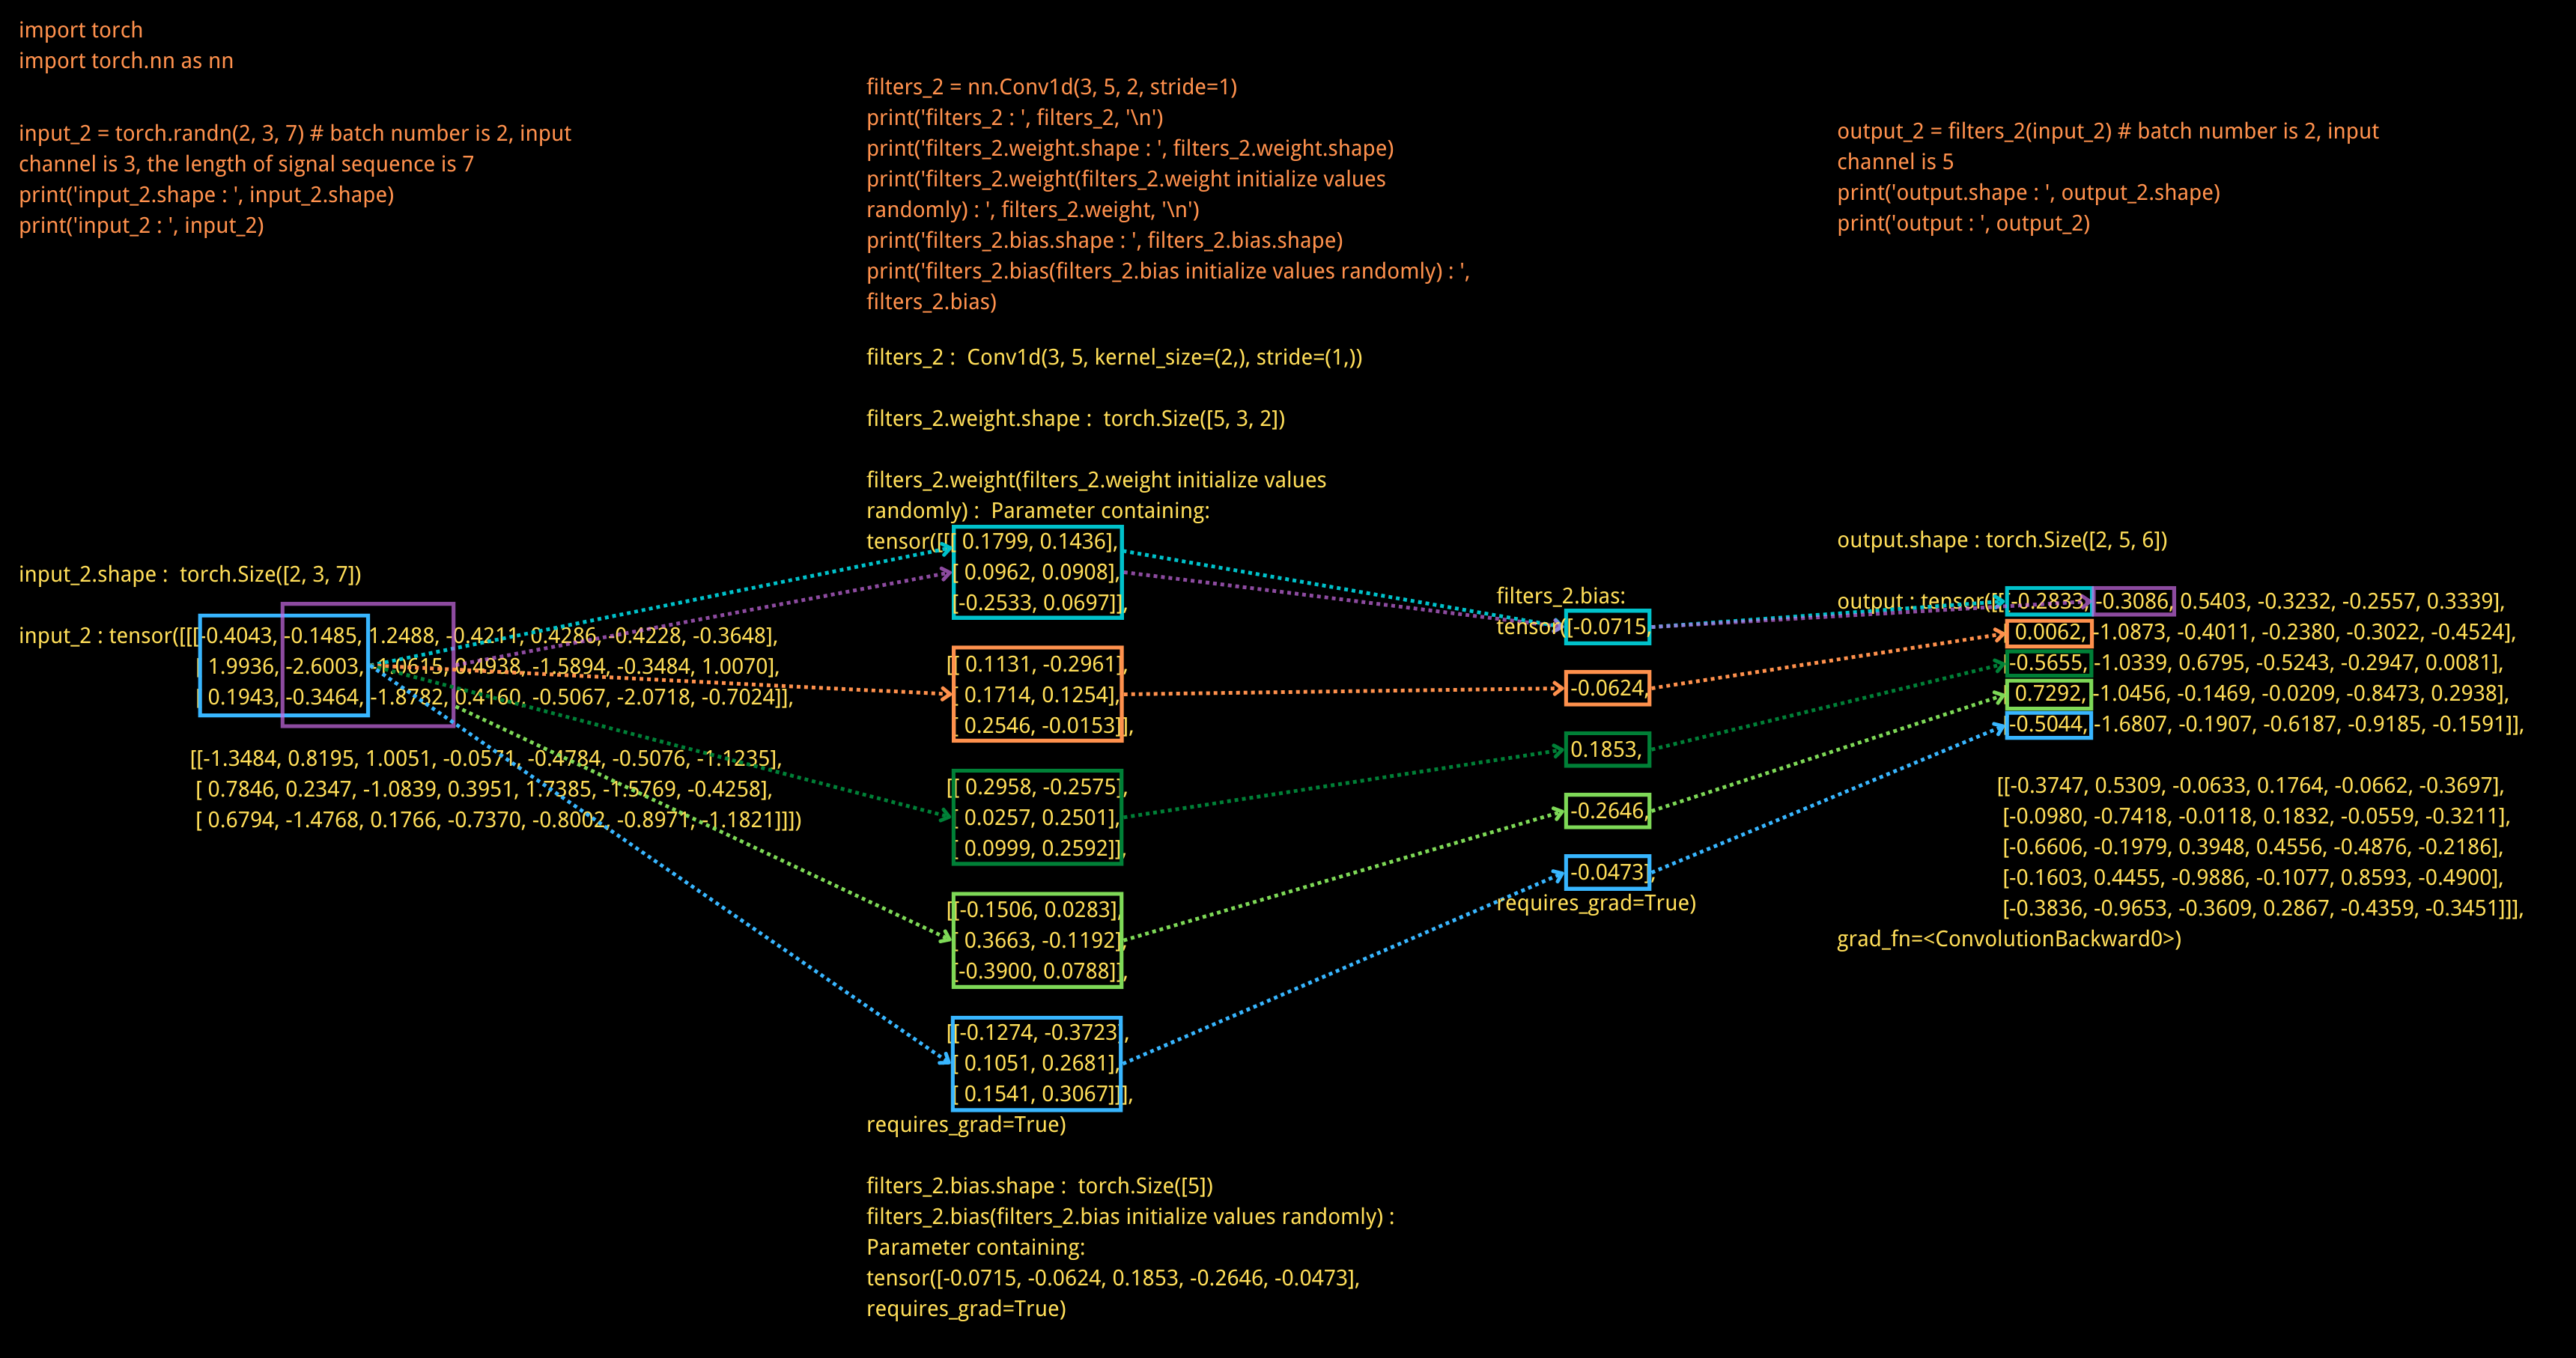

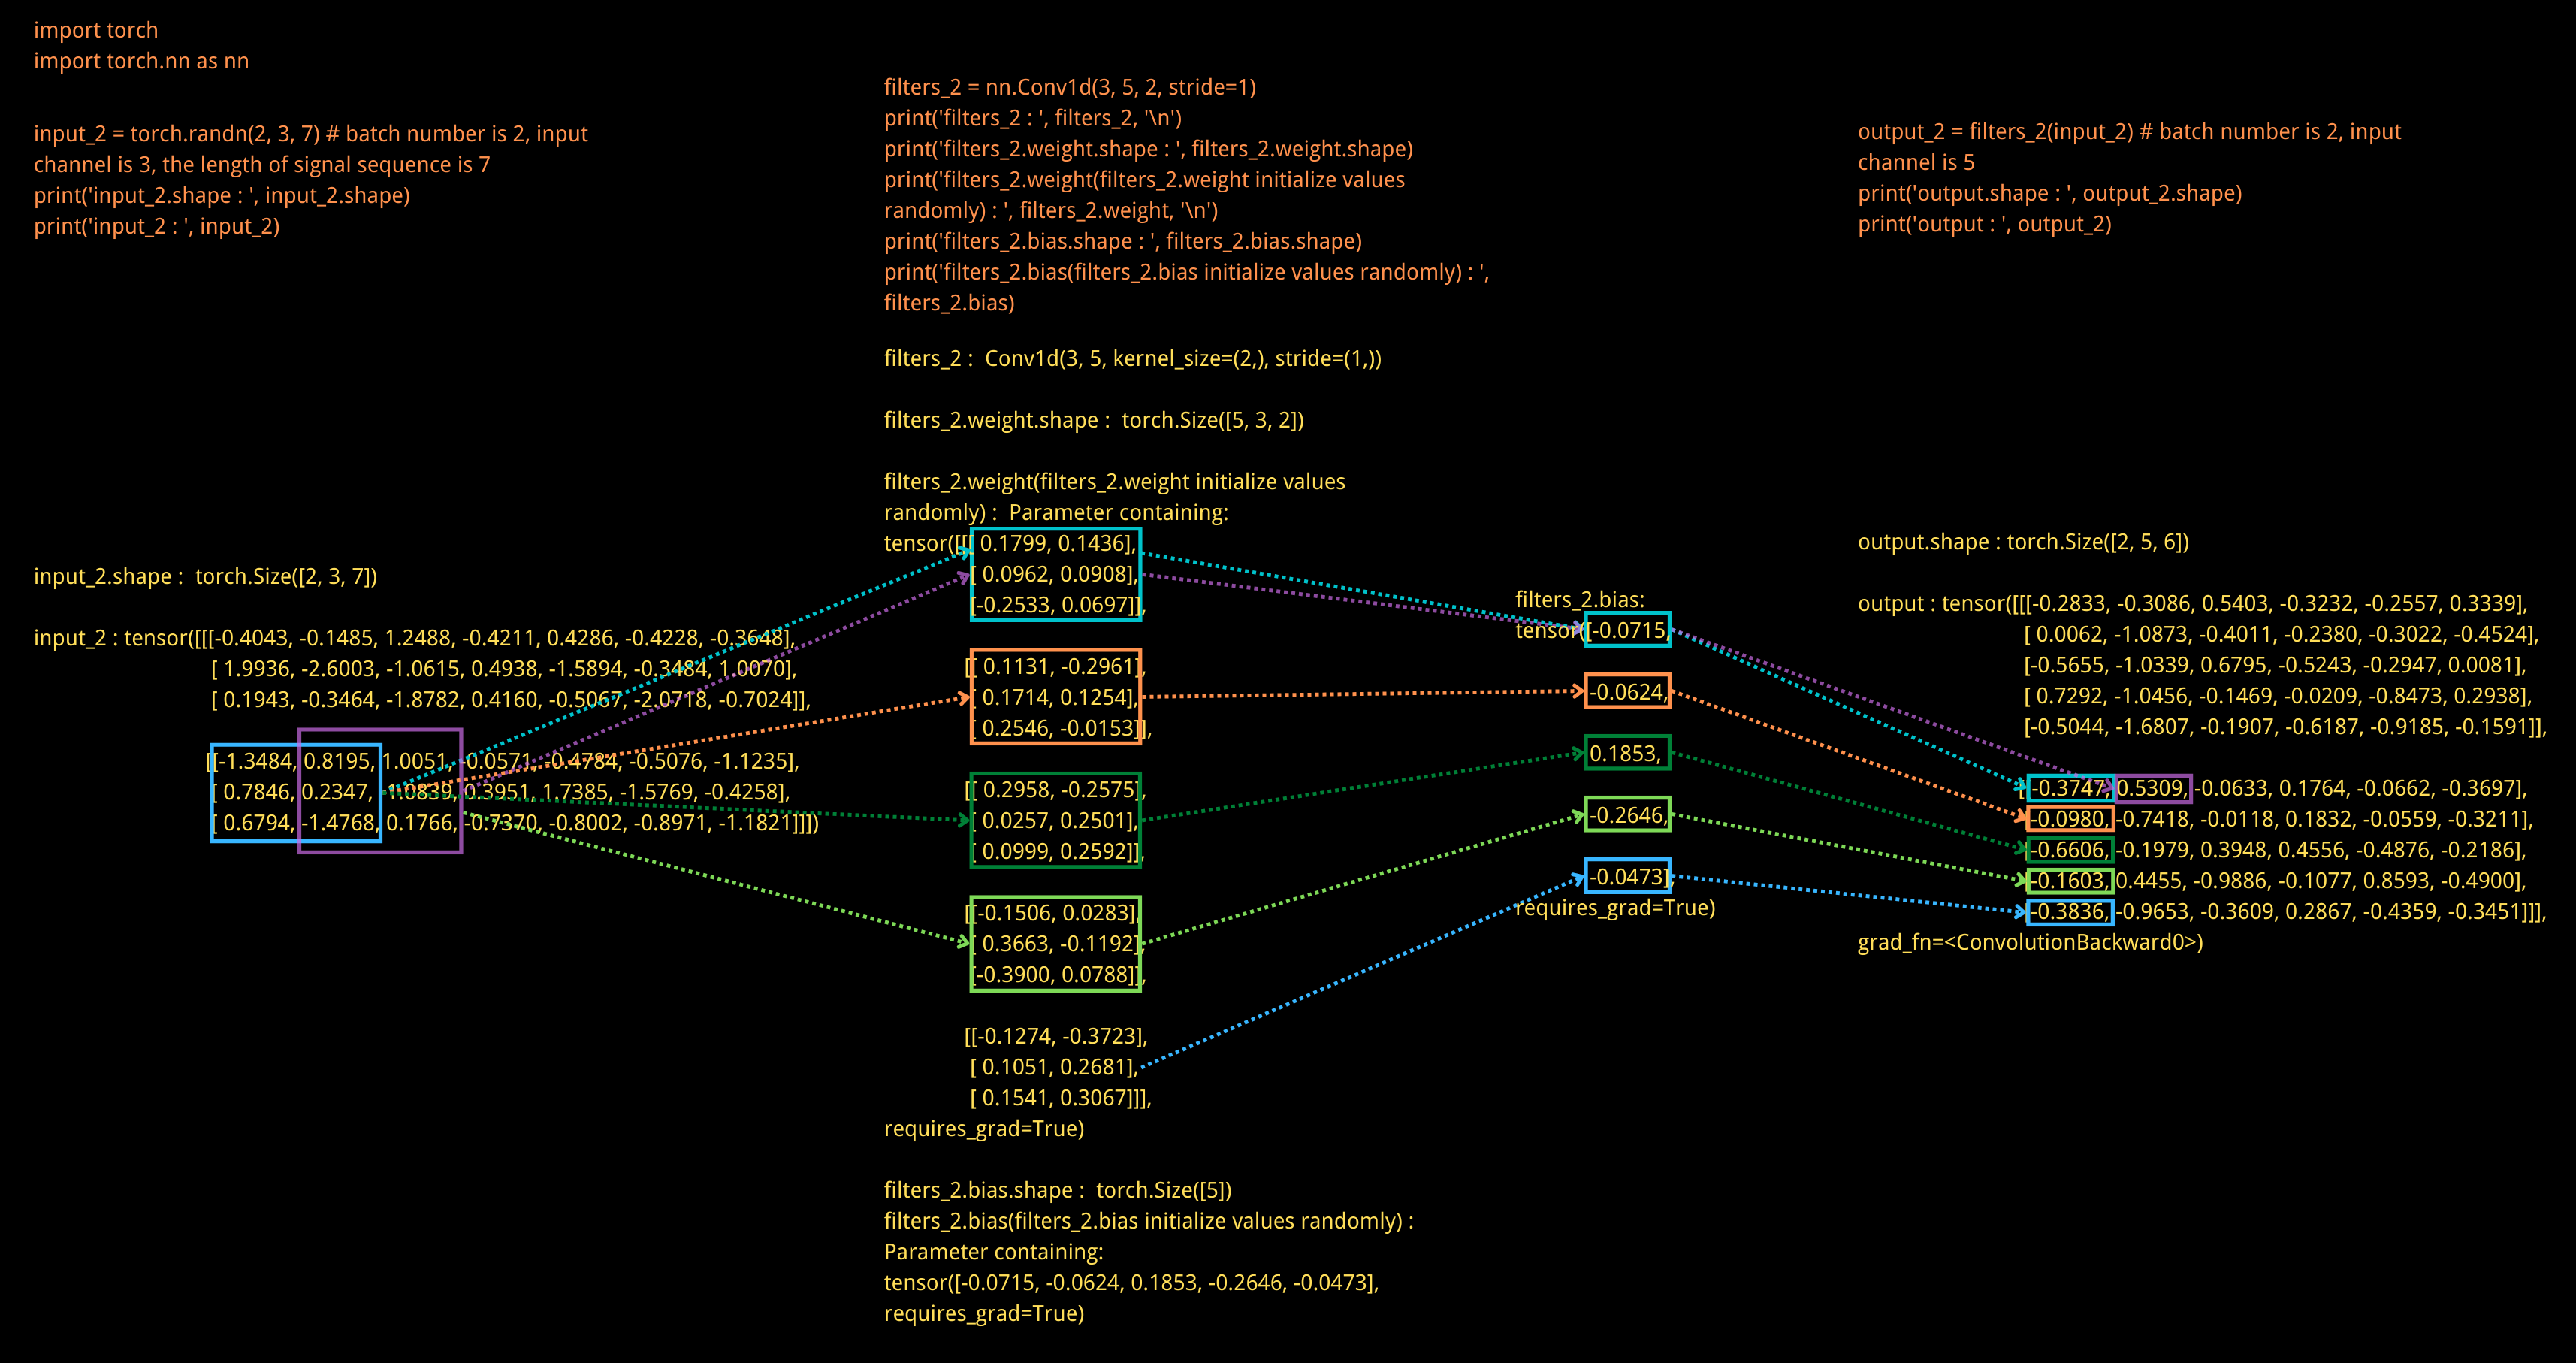

When stride is 2

In [23]:
filters_3 = nn.Conv1d(3, 5, 2, stride=2) # input_channel : 3, output_channel : 5, kernel_size : 2
print('filters_2 : ', filters_3, '\n')
print('filters_2.weight.shape : ', filters_3.weight.shape) # one kernel shape is [input_channel, kernel_size], there are as many kernels as there are output_channels
print('filters_2.weight(filters_2.weight initialize values randomly) : ', filters_3.weight, '\n')
print('filters_2.bias.shape : ', filters_3.bias.shape)
print('filters_2.bias(filters_2.bias initialize values randomly) : ', filters_3.bias)

filters_2 :  Conv1d(3, 5, kernel_size=(2,), stride=(2,)) 

filters_2.weight.shape :  torch.Size([5, 3, 2])
filters_2.weight(filters_2.weight initialize values randomly) :  Parameter containing:
tensor([[[ 0.3341, -0.3602],
         [ 0.3544,  0.2718],
         [-0.3137, -0.1001]],

        [[-0.3564, -0.2579],
         [-0.1641, -0.1440],
         [ 0.2625,  0.0928]],

        [[ 0.3244,  0.3509],
         [-0.2180,  0.0940],
         [-0.2096, -0.1040]],

        [[-0.3030,  0.0296],
         [-0.1042, -0.2494],
         [-0.2904,  0.3270]],

        [[ 0.3666, -0.0904],
         [-0.0251,  0.3773],
         [ 0.3838, -0.2859]]], requires_grad=True) 

filters_2.bias.shape :  torch.Size([5])
filters_2.bias(filters_2.bias initialize values randomly) :  Parameter containing:
tensor([ 0.3002, -0.0988, -0.3471, -0.3068,  0.2809], requires_grad=True)


In [24]:
input_3 = torch.randn(2, 3, 7) # batch number : 2, input channel : 3, the length of signal sequence : 7
print('input_2.shape : ', input_3.shape)
print('input_2 : ', input_3)

input_2.shape :  torch.Size([2, 3, 7])
input_2 :  tensor([[[-0.0022,  0.1415, -0.0186, -0.5470,  0.8465,  1.2136,  1.2543],
         [ 0.4895, -1.5654, -0.5321,  1.6606, -1.0684,  0.9879,  0.0167],
         [ 0.9606, -0.3134, -0.3771,  0.3068, -0.8414, -1.5348, -0.2441]],

        [[-1.1761,  0.4594, -0.6255,  1.7227,  1.2062,  0.3309,  0.3460],
         [-0.3801,  0.7959,  1.6332,  0.9966,  0.6914,  0.2824, -1.1000],
         [-0.4116, -0.5101,  0.1347,  1.0035, -0.8515,  0.6266, -0.4723]]])


In [25]:
output_3 = filters_3(input_3) # batch number is 2, input channel is 5
print('output.shape : ', output_3.shape)
print('output : ', output_3)

output.shape :  torch.Size([2, 5, 3])
output :  tensor([[[-0.2734,  0.8414,  0.4533],
         [ 0.2336, -0.1734, -1.0438],
         [-0.7207, -0.2259,  1.0150],
         [-0.3440, -0.4662, -0.9198],
         [ 0.1228,  0.7309,  0.9969]],

        [[ 0.0036,  0.1778,  1.1102],
         [-0.0057, -0.6033, -0.9337],
         [-0.2704, -0.3406,  0.1494],
         [-0.1430, -0.1959, -0.3527],
         [ 0.1059, -0.0043,  0.2764]]], grad_fn=<ConvolutionBackward0>)
